# Random Forest Classifier
Data : https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [1]:
# import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# memuat dataset
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\data_banknote_authentication.csv')

In [3]:
# menampilkan 5 data pertama
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# menampilkan baris dan kolom
df.shape

(1372, 5)

In [5]:
# ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# ringkasan statistik
df.describe()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# cek nilai null
df.isna().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

In [8]:
# cek data ganda
df.duplicated(subset=None).sum()

24

In [9]:
# hapus data ganda
df.drop_duplicates(inplace=True)

In [10]:
# data unik class
df['Class'].unique()

array([0, 1], dtype=int64)

In [11]:
# jumlah isi data class
df['Class'].value_counts()

0    738
1    610
Name: Class, dtype: int64

In [12]:
plt.style.use(['science','notebook','grid'])

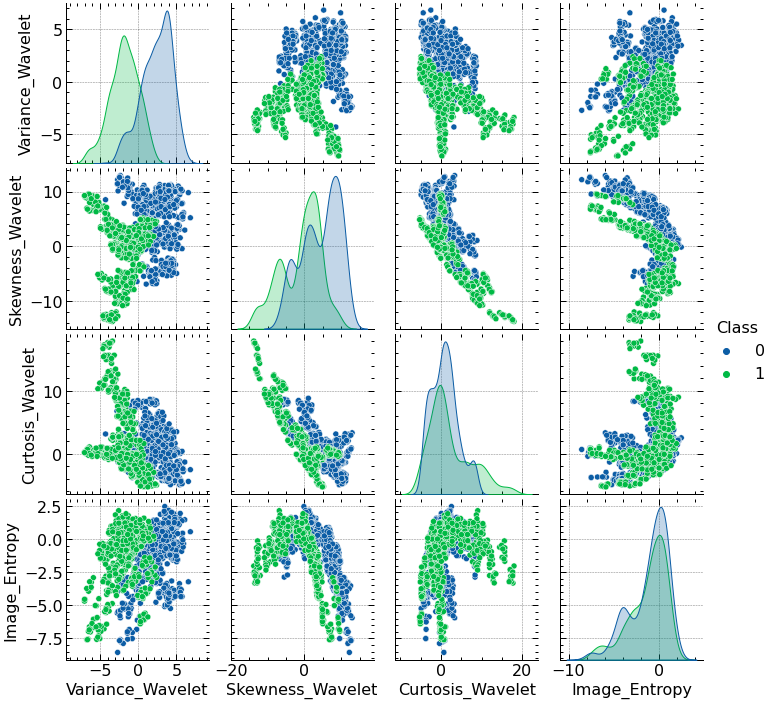

In [13]:
# ringksan sebaran dan distribusi data
sns.pairplot(df, hue='Class');

In [14]:
# colerasi data
matrix = df.corr()

# mask 

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(matrix)]=True

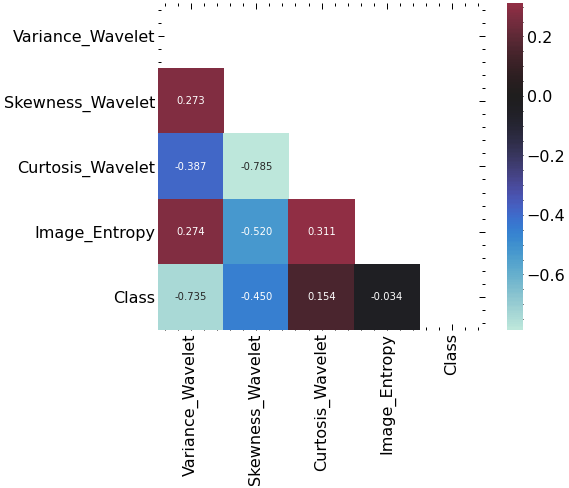

In [15]:
sns.heatmap(matrix,center=0, mask=mask, annot=True, fmt='.3f', square=True);

# Split data

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

# Scaling data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Model Random Forest Classifier dan Hyperparameter Tuning GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
model = RandomForestClassifier()

In [25]:
#help(RandomForestClassifier)

In [26]:
np.random.seed(0)
n_estimators = [int(x) for x in np.linspace(start=10, stop= 300, num=8)]
max_depth = [2,3,4]
bootstrap = [True, False]
oob_score = [True, False]

In [27]:
param_grid = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'bootstrap' : bootstrap,
             'oob_score' : oob_score}

In [28]:
grid = GridSearchCV(model, param_grid)

In [29]:
grid.fit(X_train_scaler, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. T

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4],
                         'n_estimators': [10, 51, 92, 134, 175, 217, 258, 300],
                         'oob_score': [True, False]})

In [30]:
grid.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=134, oob_score=True)

In [31]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 134,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
grid.best_estimator_.oob_score_

0.9666048237476809

In [33]:
feature = grid.best_estimator_.feature_importances_
feature

array([0.6083227 , 0.2360568 , 0.10722296, 0.04839754])

In [34]:
imp_feat = pd.DataFrame(index = X.columns, data= feature, columns=['importances']).sort_values(ascending=False,by='importances')

In [35]:
imp_feat

,importances
Variance_Wavelet,0.608323
Skewness_Wavelet,0.236057
Curtosis_Wavelet,0.107223
Image_Entropy,0.048398


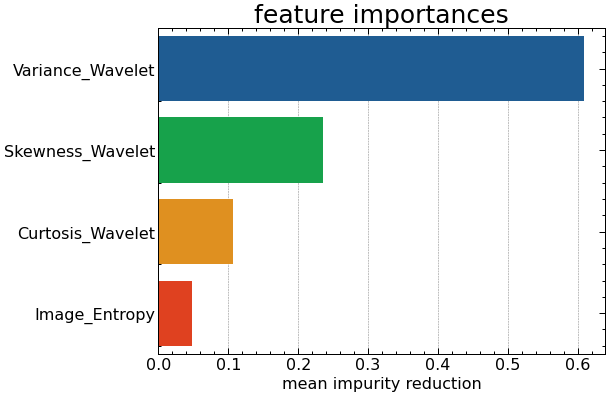

In [36]:
sns.barplot(x=imp_feat.importances, y=imp_feat.index);
plt.title('feature importances', fontsize=25)
plt.xlabel('mean impurity reduction')
plt.show()

dari hasil plot diatas dapat di simpulkan **`Variance_Wavelet`** sangat mempengaruhi model yang telah dibuat terhadap Class

In [37]:
preds = grid.predict(X_test_scaler)

## Evaluasi Model

In [38]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [39]:
confusion_matrix(y_test, preds)

array([[135,  12],
       [  0, 123]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


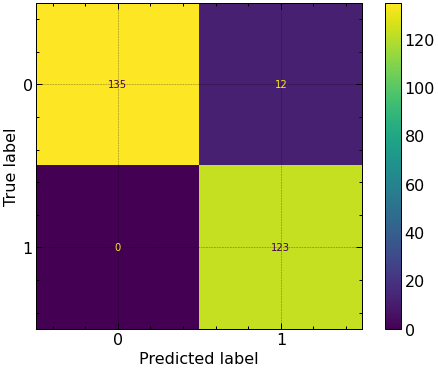

In [40]:
plot_confusion_matrix(grid, X_test_scaler, y_test)

In [41]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       147
           1       0.91      1.00      0.95       123

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270



In [42]:
accuracy_score(y_test, preds)

0.9555555555555556

----